In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [3]:
#判断数据是否读入完整
print (df.shape)
#查看数据
df.head()

(1182, 19)


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [4]:
# 数据说明与预处理
df['Time spent on TV'].replace('No tv', 0, inplace=True)
df['Time spent on TV'].replace('n', 0, inplace=True)
df['Time spent on TV'].replace('N', 0, inplace=True)
df['Time spent on TV'].replace(' ', 0, inplace=True)
df['Time spent on TV'] = df['Time spent on TV'].astype('float')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('None ', 'None')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp')

In [5]:
# 1.通过describe()和info()函数查看各类数据的分布情况
# 用 describe() 函数分别观察数值型（numeric）特征的分布和类别型（categorical）特征的分布
# 数值型（numeric）特征的分布
print(df.describe())

       Age of Subject  Time spent on Online Class  Time spent on self study  \
count     1182.000000                 1182.000000               1182.000000   
mean        20.165821                    3.208841                  2.911591   
std          5.516467                    2.101756                  2.140590   
min          7.000000                    0.000000                  0.000000   
25%         17.000000                    2.000000                  2.000000   
50%         20.000000                    3.000000                  2.000000   
75%         21.000000                    5.000000                  4.000000   
max         59.000000                   10.000000                 18.000000   

       Time spent on fitness  Time spent on sleep  Time spent on social media  \
count            1182.000000          1182.000000                 1182.000000   
mean                0.765821             7.871235                    2.365694   
std                 0.724451             1.61

In [6]:
# 类别型（categorical）特征的分布
print(df.describe(include=['O']))

          ID Region of residence Rating of Online Class experience  \
count   1182                1182                              1158   
unique  1182                   2                                 5   
top     R325           Delhi-NCR                         Very poor   
freq       1                 721                               413   

       Medium for online class Prefered social media platform  \
count                     1131                           1182   
unique                       5                             14   
top             Laptop/Desktop                      Instagram   
freq                       545                            352   

       Change in your weight Health issue during lockdown      Stress busters  \
count                   1182                         1182                1182   
unique                     3                            2                  86   
top          Remain Constant                           NO  Listening to music   

In [7]:
# 判断有无显示的缺失值（为空值的部分）
# 用info()观察缺失值情况,可看出数据集中不存在缺失值
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
ID                                                                                    1182 non-null object
Region of residence                                                                   1182 non-null object
Age of Subject                                                                        1182 non-null int64
Time spent on Online Class                                                            1182 non-null float64
Rating of Online Class experience                                                     1158 non-null object
Medium for online class                                                               1131 non-null object
Time spent on self study                                                              1182 non-null float64
Time spent on fitness                                                                 1182 non-null float64
Time spent on sleep                

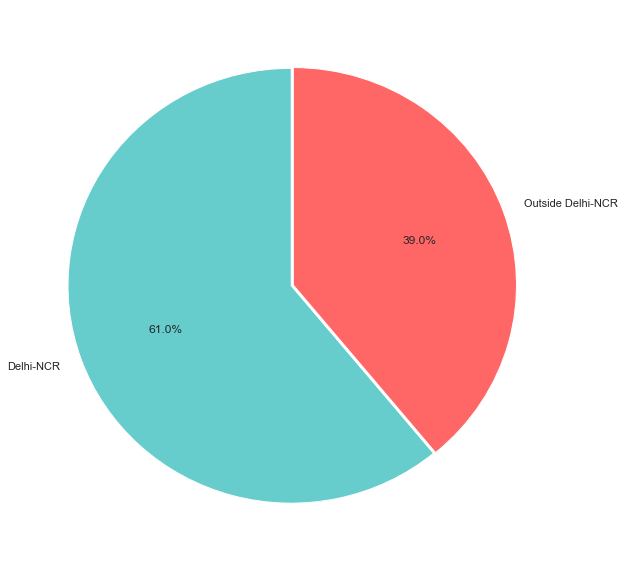

In [38]:
#Which region they belong to?
dict_ = df['Region of residence'].value_counts().to_dict()
plt.figure(figsize=(10,10))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', 
        startangle=90, explode = [0.01, 0],colors = ['#66CCCC','#FF6666'])
plt.show()

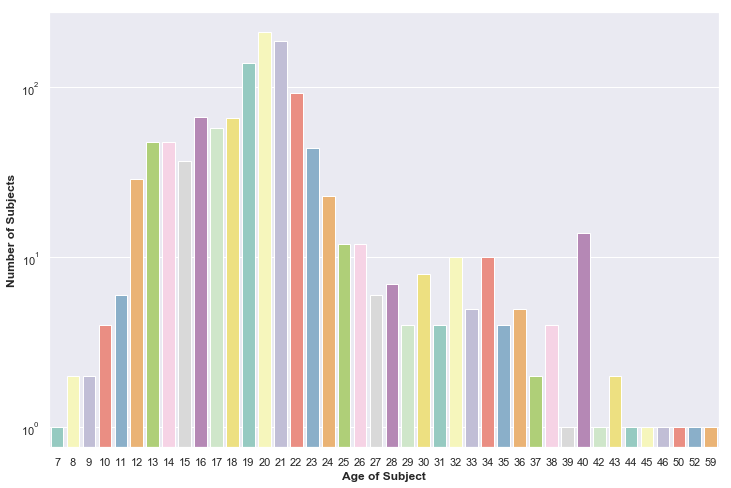

In [44]:
#What is the agewise distribution?
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.countplot(x='Age of Subject', data=df, palette='Set3')
plt.yscale('log')
plt.xlabel('Age of Subject', weight='bold')
plt.ylabel('Number of Subjects', weight='bold')
plt.show()


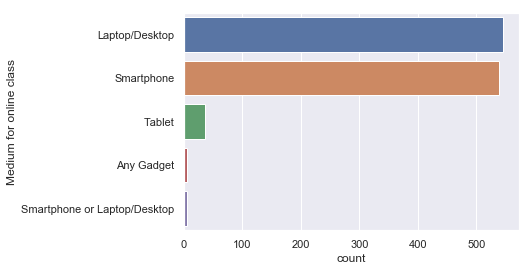

In [36]:
#What devices they use for online learning
sns.countplot(y= 'Medium for online class', data= df)

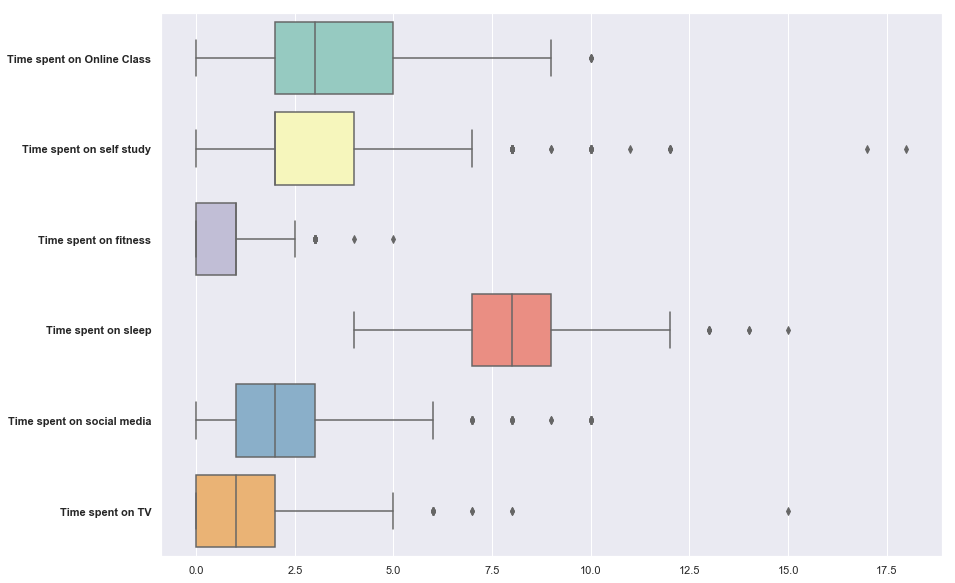

In [47]:
#How they spent their time?
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
sns.boxplot(data=df[['Time spent on Online Class','Time spent on self study','Time spent on fitness',
                    'Time spent on sleep','Time spent on social media', 'Time spent on TV']],
             orient='h', palette='Set3')
plt.yticks(weight='bold')
plt.show()

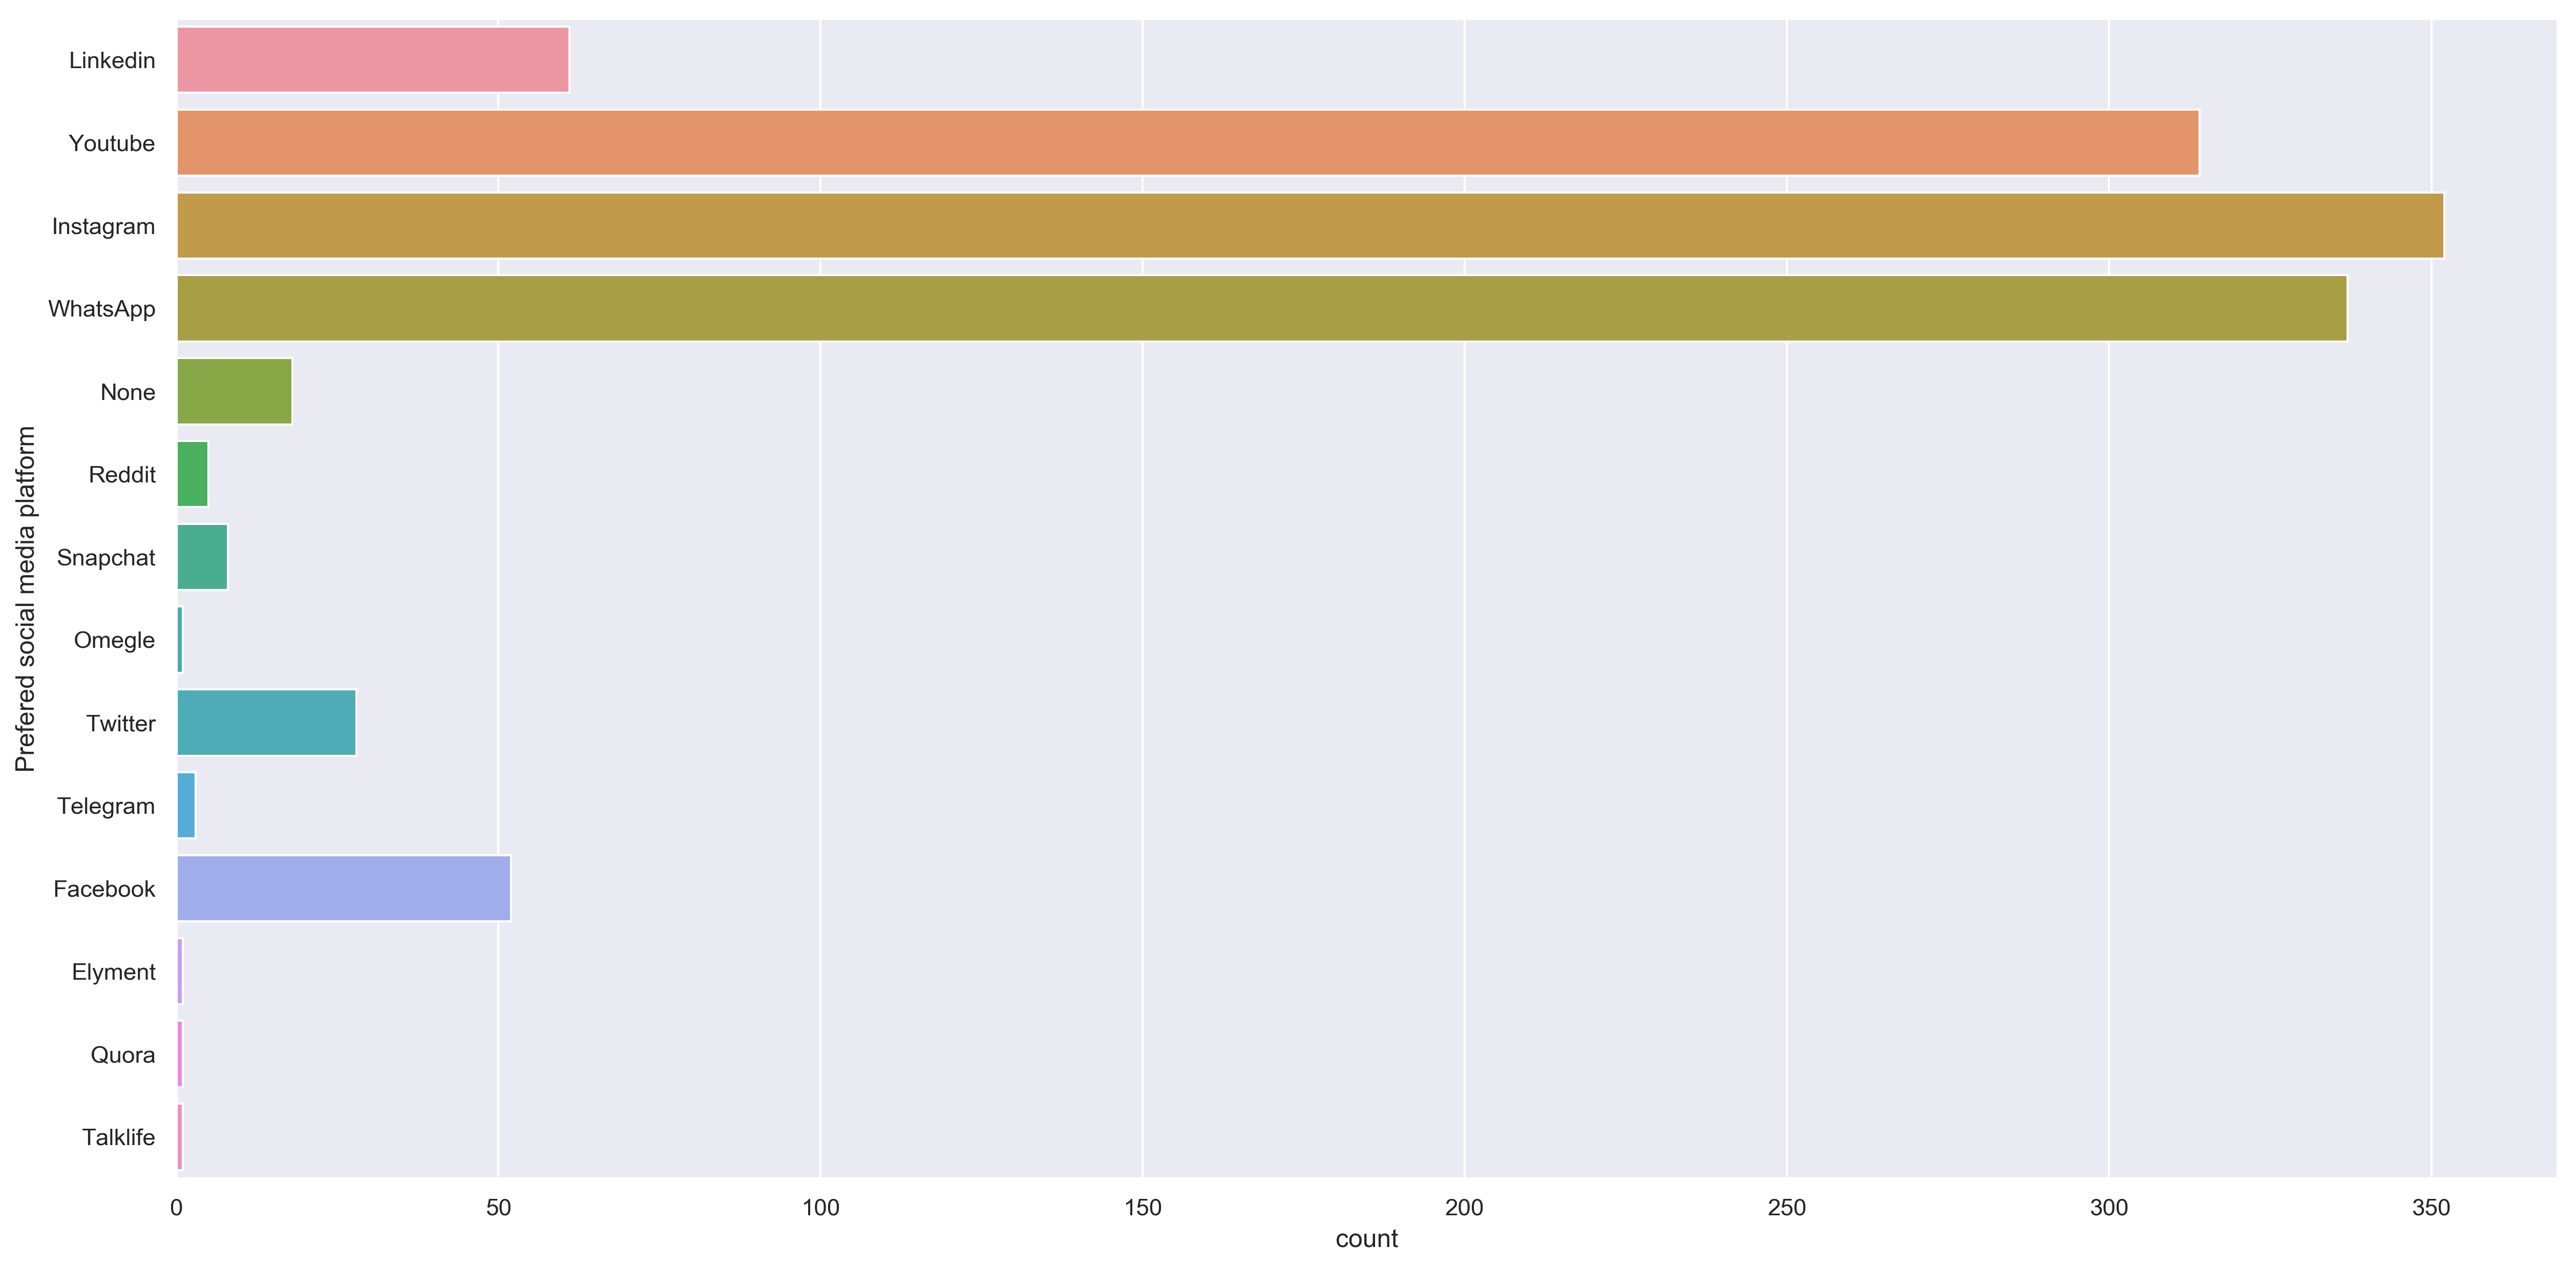

In [49]:
#What is their preferred social media platform?
plt.figure(figsize= (20, 10), dpi= 300)
sns.countplot(y= 'Prefered social media platform', data= df)

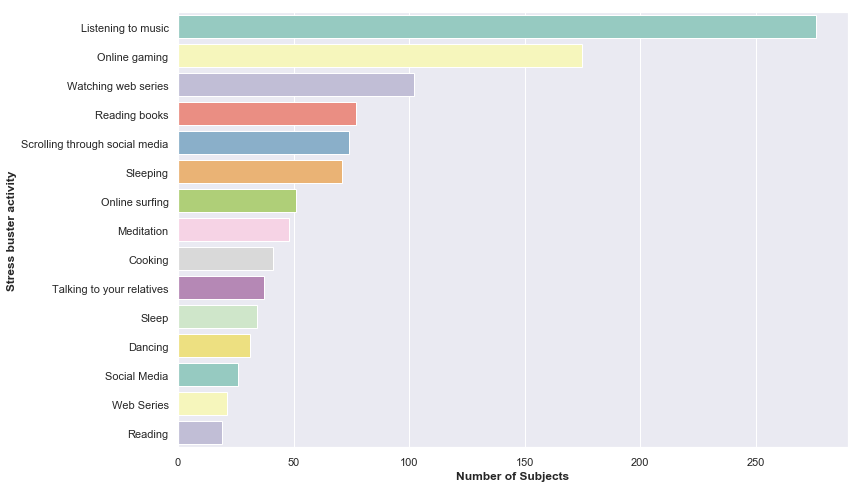

In [70]:
#What is their favourite stress buster?
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.countplot(y='Stress busters', data=df, order=df['Stress busters'].value_counts().index[:15], palette='Set3')
plt.xlabel("Number of Subjects", weight='bold')
plt.ylabel("Stress buster activity", weight='bold')
plt.show()




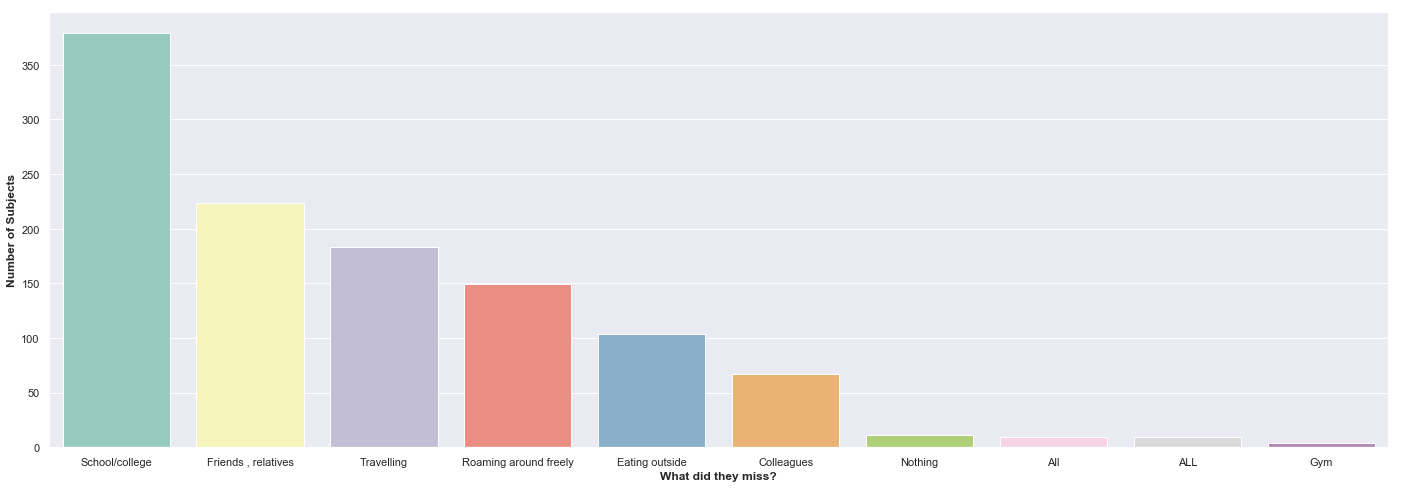

In [72]:
#What did they miss the most?
plt.figure(figsize=(24,8))
sns.set(style='darkgrid')
sns.countplot(x='What you miss the most', data=df, order=df['What you miss the most'].value_counts().index[:10], palette='Set3')
plt.ylabel("Number of Subjects", weight='bold')
plt.xlabel("What did they miss?", weight='bold')
plt.show()



E:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


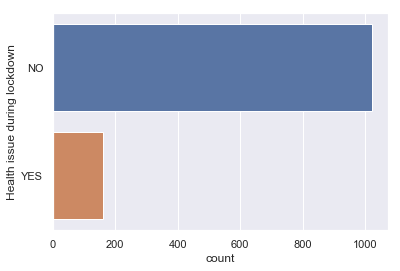

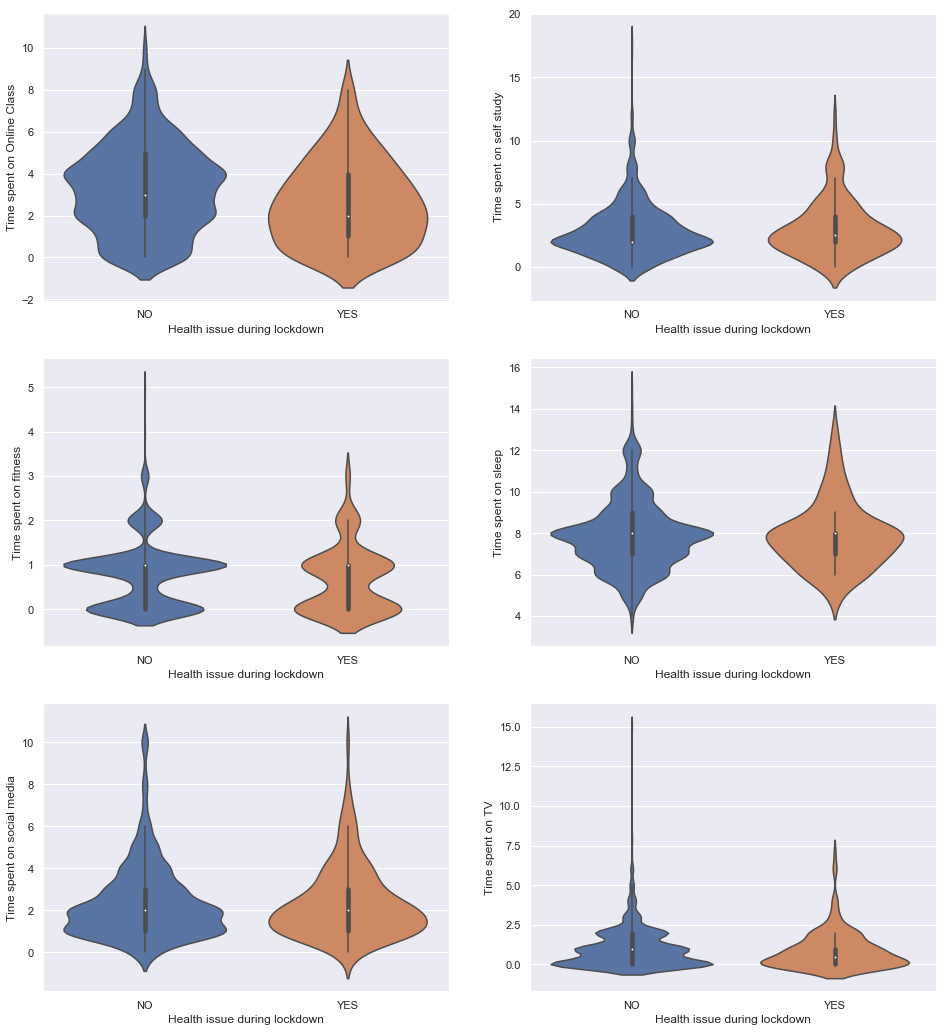

In [80]:
#How many of the students got healt issue during the time?
sns.countplot(y= "Health issue during lockdown", data= df)

#How their health has been impacted by various factors?
##The activities they spent their time on?
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(16,18))
sns.violinplot(x='Health issue during lockdown', y='Time spent on Online Class', data=df, ax=ax[0,0])
sns.violinplot(x='Health issue during lockdown', y='Time spent on self study', data=df, ax=ax[0,1])
sns.violinplot(x='Health issue during lockdown', y='Time spent on fitness', data=df, ax=ax[1,0])
sns.violinplot(x='Health issue during lockdown', y='Time spent on sleep', data=df, ax=ax[1,1])
sns.violinplot(x='Health issue during lockdown', y='Time spent on social media', data=df, ax=ax[2,0])
sns.violinplot(x='Health issue during lockdown', y='Time spent on TV', data=df, ax=ax[2,1])
plt.show()

E:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


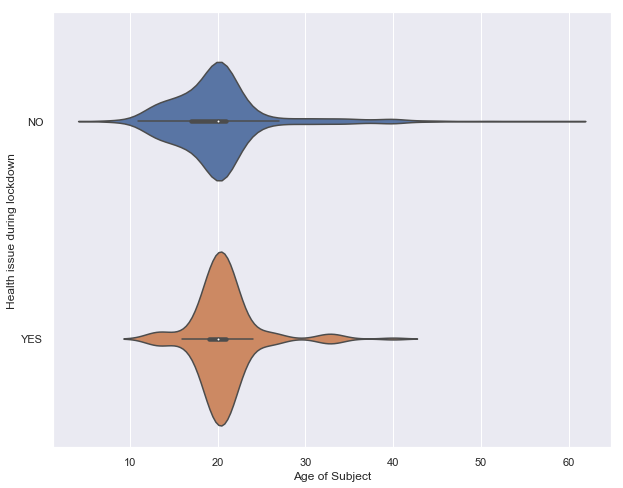

In [28]:
#On their respective age?
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.violinplot(y='Health issue during lockdown', x='Age of Subject', data=df)
plt.show()

E:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


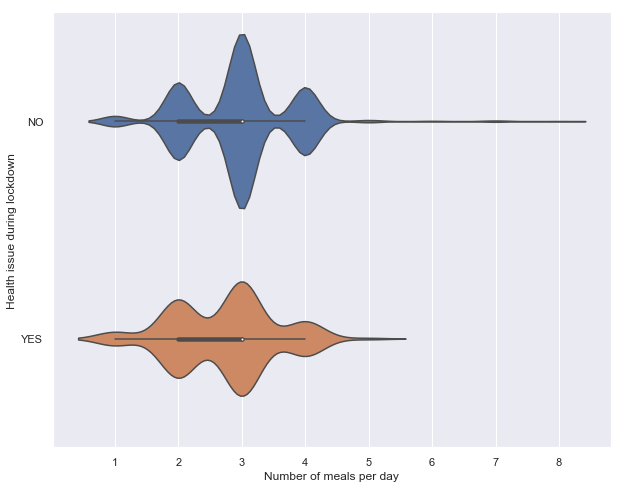

In [29]:
#On the number of meals they had?
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.violinplot(y='Health issue during lockdown', x='Number of meals per day', data=df)
plt.show()

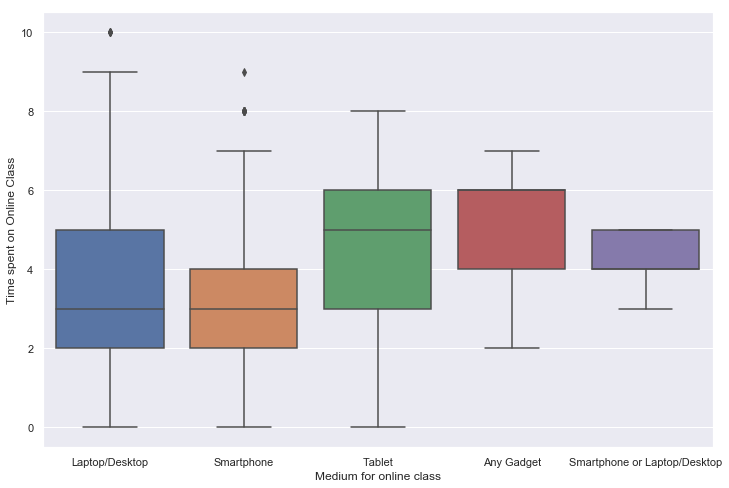

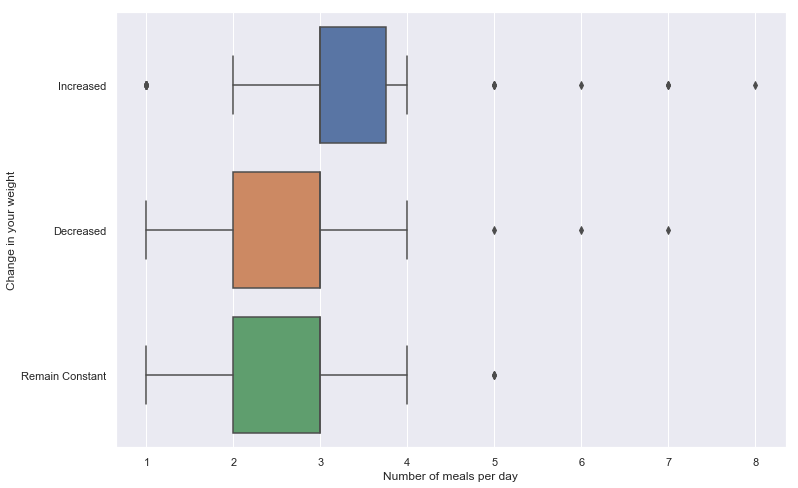

In [82]:
#The students who are learning more, are from which medium?
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(y='Time spent on Online Class', x='Medium for online class', data=df)
plt.show()

#Does number of meals affect their weight?
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(y='Change in your weight', x='Number of meals per day', data=df)
plt.show()

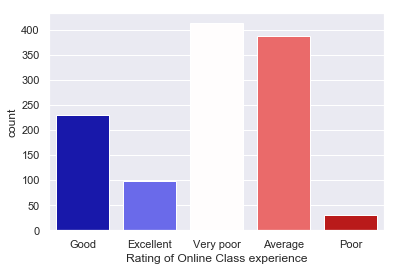

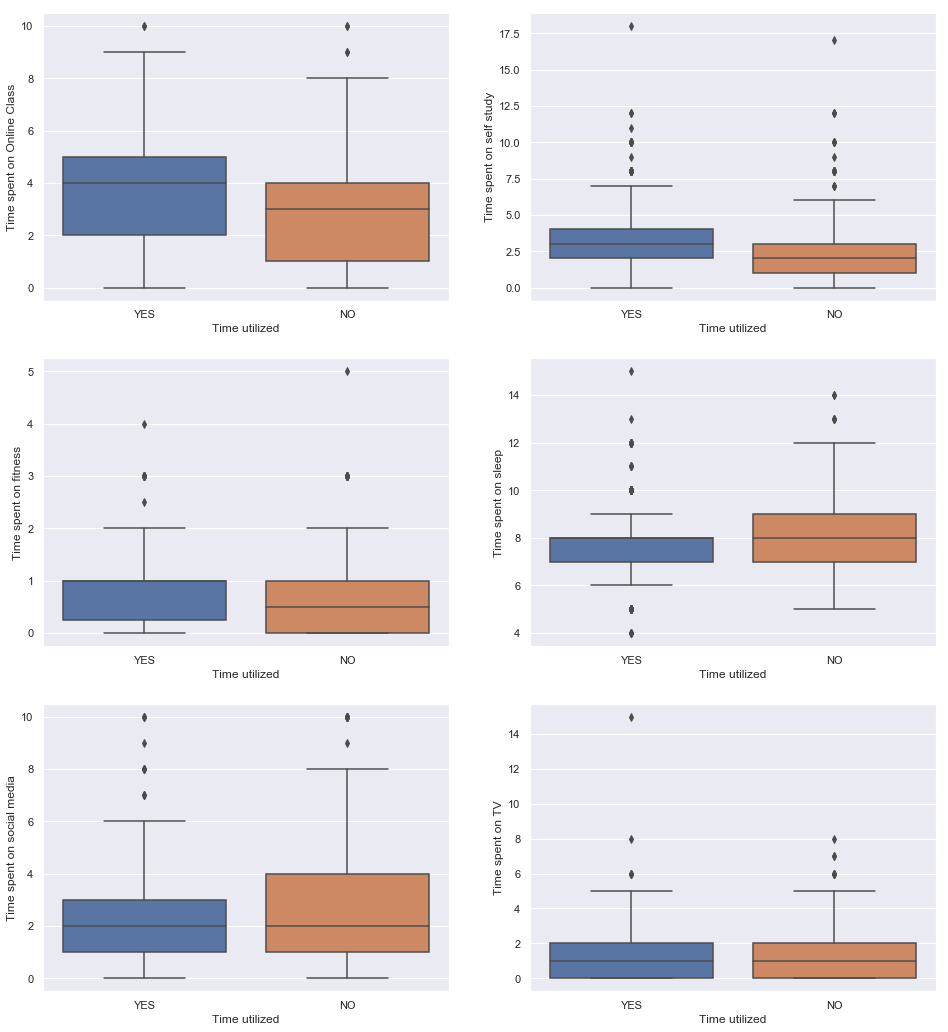

In [89]:

# Common rates
sns.countplot(x= 'Rating of Online Class experience', data= df, palette= 'seismic')

#How they utilised their time?
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(16,18))
sns.boxplot(x='Time utilized', y='Time spent on Online Class', data=df, ax=ax[0,0])
sns.boxplot(x='Time utilized', y='Time spent on self study', data=df, ax=ax[0,1])
sns.boxplot(x='Time utilized', y='Time spent on fitness', data=df, ax=ax[1,0])
sns.boxplot(x='Time utilized', y='Time spent on sleep', data=df, ax=ax[1,1])
sns.boxplot(x='Time utilized', y='Time spent on social media', data=df, ax=ax[2,0])
sns.boxplot(x='Time utilized', y='Time spent on TV', data=df, ax=ax[2,1])
plt.show()

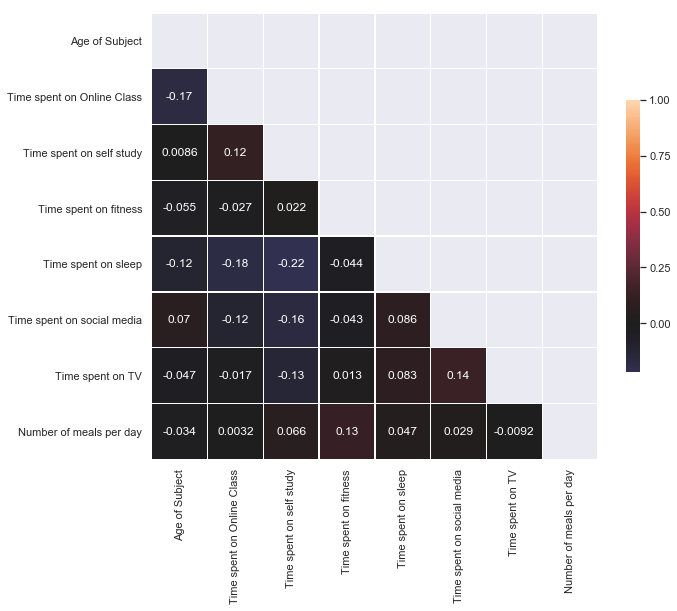

In [32]:
#Heatmap (correlation) among numerical features
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()